# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.041363e+01     7.376048e+00
 * time: 0.00174713134765625
     1     2.930219e+01     5.111349e+00
 * time: 0.007697105407714844
     2     2.134430e+01     7.270243e+00
 * time: 0.014923095703125
     3     1.714576e+01     7.404796e+00
 * time: 0.02211308479309082
     4     1.302981e+01     3.299944e+00
 * time: 0.02917313575744629
     5     9.700057e+00     1.263282e+00
 * time: 0.03657102584838867
     6     8.935406e+00     1.632782e+00
 * time: 0.07079601287841797
     7     8.546431e+00     8.401243e-01
 * time: 0.0757601261138916
     8     8.389678e+00     6.750286e-01
 * time: 0.08042311668395996
     9     8.272210e+00     7.631420e-01
 * time: 0.08487510681152344
    10     8.216362e+00     8.810564e-01
 * time: 0.08842992782592773
    11     8.175598e+00     6.510427e-01
 * time: 0.09206914901733398
    12     8.102938e+00     4.661226e-01
 * time: 0.09564495086669922
    13     8.044115e+00     5.028315e-01
 * time: 0

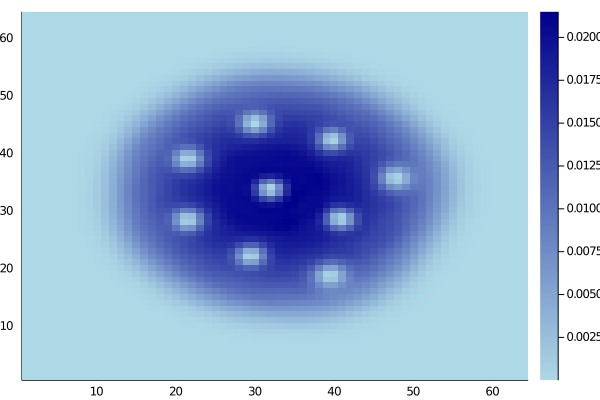

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)